In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil

In [6]:
data_dir1 = r"E:\8th sem\Computer vission\New folder\dataset\with_mask"
# Create destination directories
train_dir = r'E:\8th sem\Computer vission\New folder\Train\with_mask'
validation_dir = r'E:\8th sem\Computer vission\New folder\Valid\with_mask'

# Create the folders if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Get all image filenames
all_images = os.listdir(data_dir1)

# Split the filenames into train and validation sets (80-20 split)
train_images, validation_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Move the images to their respective directories
for image in train_images:
    shutil.move(os.path.join(data_dir1, image), os.path.join(train_dir, image))

for image in validation_images:
    shutil.move(os.path.join(data_dir1, image), os.path.join(validation_dir, image))

print(f'Moved {len(train_images)} images to the training folder and {len(validation_images)} images to the validation folder.')

Moved 176 images to the training folder and 44 images to the validation folder.


In [8]:
data_dir2 = r"E:\8th sem\Computer vission\New folder\dataset\without_mask"
# Create destination directories
train_dir1 = r'E:\8th sem\Computer vission\New folder\Train\without_mask'
validation_dir1 = r'E:\8th sem\Computer vission\New folder\Valid\without_mask'

# Create the folders if they don't exist
os.makedirs(train_dir1, exist_ok=True)
os.makedirs(validation_dir1, exist_ok=True)

# Get all image filenames
all_images = os.listdir(data_dir2)

# Split the filenames into train and validation sets (80-20 split)
train_images, validation_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Move the images to their respective directories
for image in train_images:
    shutil.move(os.path.join(data_dir2, image), os.path.join(train_dir1, image))

for image in validation_images:
    shutil.move(os.path.join(data_dir2, image), os.path.join(validation_dir1, image))

print(f'Moved {len(train_images)} images to the training folder and {len(validation_images)} images to the validation folder.')

Moved 176 images to the training folder and 44 images to the validation folder.


In [9]:
TRAIN_DATA_DIR = r"E:\8th sem\Computer vission\New folder\Train"
VALID_DATA_DIR = r"E:\8th sem\Computer vission\New folder\Valid"
TEST_DATA_DIR = r"E:\8th sem\Computer vission\New folder\Test"

In [10]:
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['without_mask', 'with_mask']


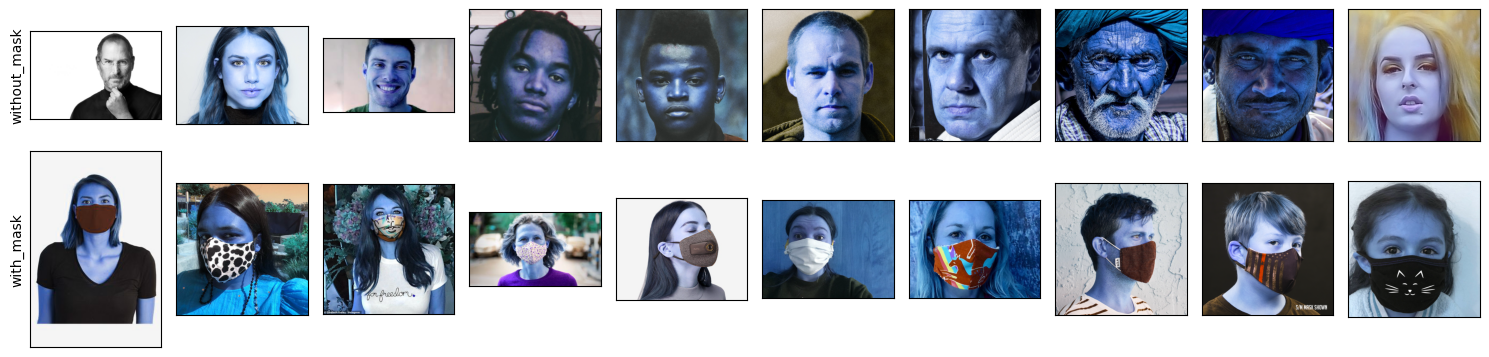

In [11]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [14]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (256,256))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 115.81it/s]

352


In [17]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (256,256))  # resize the image
            valid_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(valid_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 123.49it/s]

88


In [18]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (256,256))  # resize the image
            test_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(test_data))

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 40.41it/s]

92


In [19]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [20]:
train_img=[]
train_label=[]

for img,label in training_data:
    train_img.append(img)
    train_label.append(label)
train_img=np.array(train_img).astype('float32').reshape(-1,256,256,3)
train_label=np.array(train_label)

print(f"train_img= {train_img.shape} train_label= {train_label.shape}")

train_img= (528, 256, 256, 3) train_label= (528,)


In [21]:
valid_img=[]
valid_label=[]

for img,label in valid_data:
    valid_img.append(img)
    valid_label.append(label)
valid_img=np.array(valid_img).astype('float32').reshape(-1,256,256,3)
valid_label=np.array(valid_label)

print(f"valid_img= {valid_img.shape} valid_label= {valid_label.shape}")

valid_img= (88, 256, 256, 3) valid_label= (88,)


In [22]:
test_img=[]
test_label=[]

for img,label in test_data:
    test_img.append(img)
    test_label.append(label)
test_img=np.array(test_img).astype('float32').reshape(-1,256,256,3)
test_label=np.array(test_label)

print(f"test_img= {test_img.shape} test_label= {test_label.shape}")

test_img= (92, 256, 256, 3) test_label= (92,)


In [24]:
pickle_out = open(r"E:\8th sem\Computer vission\New folder/train_img.pickle","wb")
pickle.dump(train_img, pickle_out)
pickle_out.close()

pickle_out = open(r"E:\8th sem\Computer vission\New folder/train_label.pickle","wb")
pickle.dump(train_label, pickle_out)
pickle_out.close()

pickle_out = open(r"E:\8th sem\Computer vission\New folder/valid_img.pickle","wb")
pickle.dump(valid_img, pickle_out)
pickle_out.close()

pickle_out = open(r"E:\8th sem\Computer vission\New folder/valid_label.pickle","wb")
pickle.dump(valid_label, pickle_out)
pickle_out.close()

pickle_out = open(r"E:\8th sem\Computer vission\New folder/test_img.pickle","wb")
pickle.dump(test_img, pickle_out)
pickle_out.close()

pickle_out = open(r"E:\8th sem\Computer vission\New folder/test_label.pickle","wb")
pickle.dump(test_label, pickle_out)
pickle_out.close()